In [440]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm

In [441]:
train = pd.read_csv('C:/Users/JCM/Desktop/Python/Test_CSV_Files/Adv_House_Price_Regression/train.csv').set_index('Id')
test = pd.read_csv('C:/Users/JCM/Desktop/Python/Test_CSV_Files/Adv_House_Price_Regression/test.csv').set_index('Id')

In [442]:
test['SalePrice'] = 0

In [443]:
data = pd.concat([train,test], axis=0)

In [444]:
data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,0
2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,0
2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,0


In [445]:
feature = data.isnull().sum().sort_values(ascending=False).index
missing_values = data.isnull().sum().sort_values(ascending=False).values

In [446]:
mis_values = pd.DataFrame({'feature': feature, 'missing': missing_values/2919})

In [447]:
mis_values

,feature,missing
0,PoolQC,0.996574
1,MiscFeature,0.964029
2,Alley,0.932169
3,Fence,0.804385
4,FireplaceQu,0.486468
...,...,...
75,1stFlrSF,0.000000
76,CentralAir,0.000000
77,SaleCondition,0.000000
78,Heating,0.000000


In [448]:
mis_values = mis_values[mis_values['missing']<=.3]

In [449]:
data = data[list(mis_values.feature)]

In [450]:
data

,LotFrontage,GarageFinish,GarageQual,GarageCond,GarageYrBlt,GarageType,BsmtCond,BsmtExposure,BsmtQual,BsmtFinType2,...,HalfBath,FullBath,GrLivArea,LowQualFinSF,2ndFlrSF,1stFlrSF,CentralAir,SaleCondition,Heating,MSSubClass
Id,,,,,,,,,,,,,,,,,,,,,
1,65.0,RFn,TA,TA,2003.0,Attchd,TA,No,Gd,Unf,...,1,2,1710,0,854,856,Y,Normal,GasA,60
2,80.0,RFn,TA,TA,1976.0,Attchd,TA,Gd,Gd,Unf,...,0,2,1262,0,0,1262,Y,Normal,GasA,20
3,68.0,RFn,TA,TA,2001.0,Attchd,TA,Mn,Gd,Unf,...,1,2,1786,0,866,920,Y,Normal,GasA,60
4,60.0,Unf,TA,TA,1998.0,Detchd,Gd,No,TA,Unf,...,0,1,1717,0,756,961,Y,Abnorml,GasA,70
5,84.0,RFn,TA,TA,2000.0,Attchd,TA,Av,Gd,Unf,...,1,2,2198,0,1053,1145,Y,Normal,GasA,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,21.0,NaN,NaN,NaN,NaN,NaN,TA,No,TA,Unf,...,1,1,1092,0,546,546,Y,Normal,GasA,160
2916,21.0,Unf,TA,TA,1970.0,CarPort,TA,No,TA,Unf,...,1,1,1092,0,546,546,Y,Abnorml,GasA,160
2917,160.0,Unf,TA,TA,1960.0,Detchd,TA,No,TA,Unf,...,0,1,1224,0,0,1224,Y,Abnorml,GasA,20


In [451]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Data columns (total 75 columns):
LotFrontage      2433 non-null float64
GarageFinish     2760 non-null object
GarageQual       2760 non-null object
GarageCond       2760 non-null object
GarageYrBlt      2760 non-null float64
GarageType       2762 non-null object
BsmtCond         2837 non-null object
BsmtExposure     2837 non-null object
BsmtQual         2838 non-null object
BsmtFinType2     2839 non-null object
BsmtFinType1     2840 non-null object
MasVnrType       2895 non-null object
MasVnrArea       2896 non-null float64
MSZoning         2915 non-null object
Functional       2917 non-null object
Utilities        2917 non-null object
BsmtHalfBath     2917 non-null float64
BsmtFullBath     2917 non-null float64
Exterior2nd      2918 non-null object
Exterior1st      2918 non-null object
BsmtUnfSF        2918 non-null float64
TotalBsmtSF      2918 non-null float64
GarageArea       2918 non-null float64
KitchenQual

In [452]:
num_cols = data.select_dtypes(include=['int64','float64']).columns
cat_cols = data.select_dtypes(include=['object']).columns

In [453]:
for col in num_cols:
    fill = data[col].median()
    data[col] = data[col].fillna(fill)

C:\Users\JCM\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [454]:
for col in cat_cols:
    fill = data[col].mode()[0]
    data[col] = data[col].fillna(fill)

C:\Users\JCM\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [455]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Data columns (total 75 columns):
LotFrontage      2919 non-null float64
GarageFinish     2919 non-null object
GarageQual       2919 non-null object
GarageCond       2919 non-null object
GarageYrBlt      2919 non-null float64
GarageType       2919 non-null object
BsmtCond         2919 non-null object
BsmtExposure     2919 non-null object
BsmtQual         2919 non-null object
BsmtFinType2     2919 non-null object
BsmtFinType1     2919 non-null object
MasVnrType       2919 non-null object
MasVnrArea       2919 non-null float64
MSZoning         2919 non-null object
Functional       2919 non-null object
Utilities        2919 non-null object
BsmtHalfBath     2919 non-null float64
BsmtFullBath     2919 non-null float64
Exterior2nd      2919 non-null object
Exterior1st      2919 non-null object
BsmtUnfSF        2919 non-null float64
TotalBsmtSF      2919 non-null float64
GarageArea       2919 non-null float64
KitchenQual

In [456]:
train_df = data[data['SalePrice']>0]

In [457]:
cor = train_df.corr()

<AxesSubplot:>

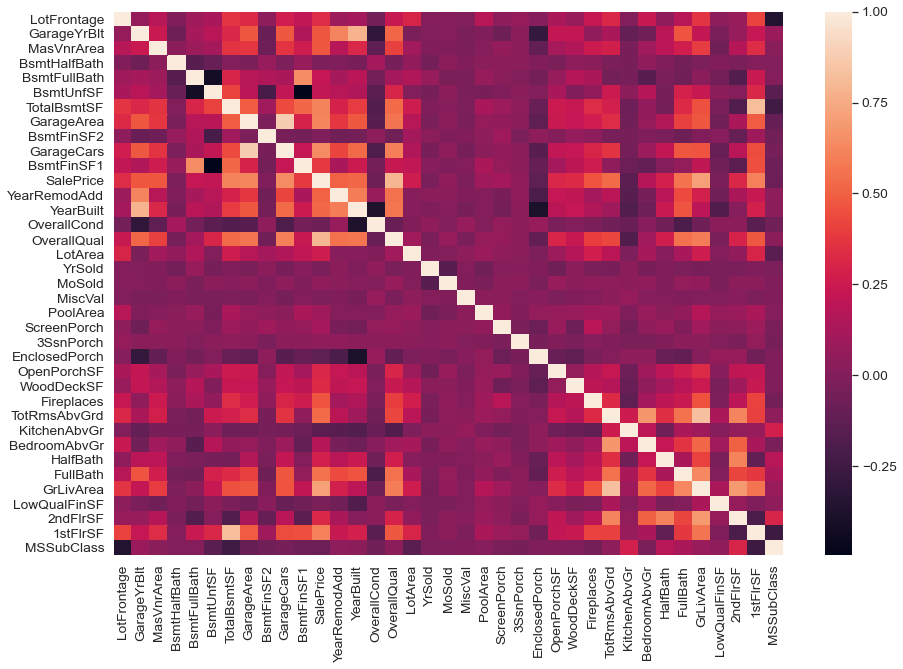

In [458]:
plt.subplots(figsize=(15,10))
sns.heatmap(cor,annot=False)

<AxesSubplot:>

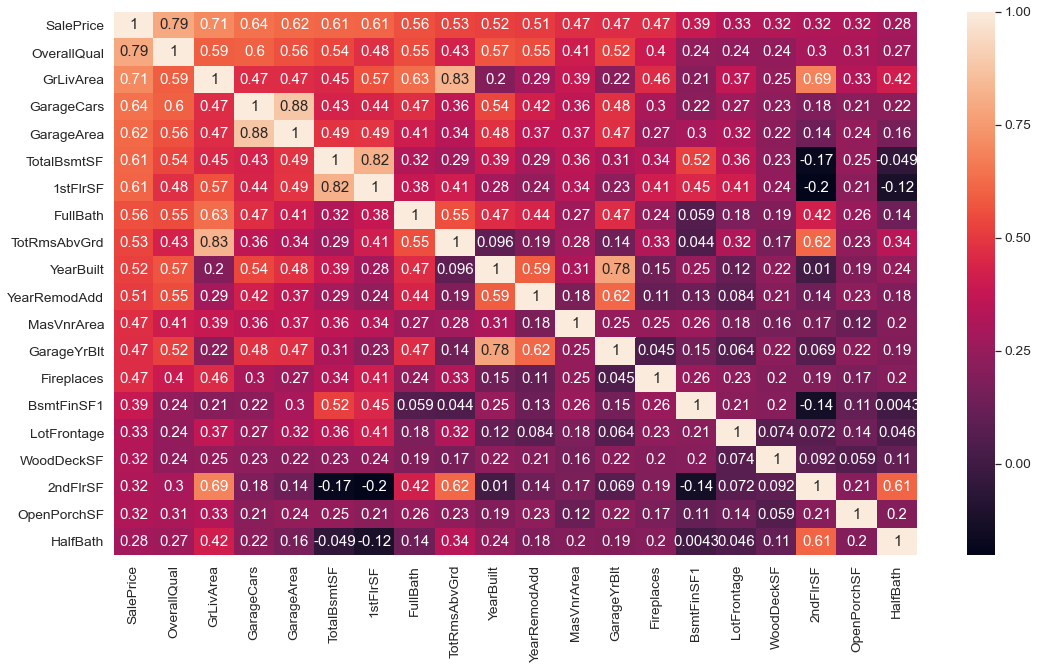

In [459]:
cols = cor.nlargest(20,'SalePrice')['SalePrice'].index
cm = np.corrcoef(train_df[cols].values.T)
plt.figure(figsize=(18,10))
sns.set(font_scale=1.25)
sns.heatmap(cm,annot=True,xticklabels=cols.values,yticklabels=cols.values)

In [460]:
num_cols

Index(['LotFrontage', 'GarageYrBlt', 'MasVnrArea', 'BsmtHalfBath',
       'BsmtFullBath', 'BsmtUnfSF', 'TotalBsmtSF', 'GarageArea', 'BsmtFinSF2',
       'GarageCars', 'BsmtFinSF1', 'SalePrice', 'YearRemodAdd', 'YearBuilt',
       'OverallCond', 'OverallQual', 'LotArea', 'YrSold', 'MoSold', 'MiscVal',
       'PoolArea', 'ScreenPorch', '3SsnPorch', 'EnclosedPorch', 'OpenPorchSF',
       'WoodDeckSF', 'Fireplaces', 'TotRmsAbvGrd', 'KitchenAbvGr',
       'BedroomAbvGr', 'HalfBath', 'FullBath', 'GrLivArea', 'LowQualFinSF',
       '2ndFlrSF', '1stFlrSF', 'MSSubClass'],
      dtype='object')

In [461]:
def show(col):
    
    num = data[data[col]==0]
    
    sns.scatterplot(x=data[col],y=data['SalePrice'])
    plt.show()
    
    sns.distplot(data[col],fit=norm)
    fig = plt.figure()
    res = stats.probplot(data[col],plot=plt)
    
    return num

In [462]:
def log(col):
    data[col] = np.log(data[col])
    sns.distplot((data[col]),fit=norm)

In [463]:
def log0(col):
    data[col] = np.log(data[col]+1)
    sns.distplot(data[col],fit=norm)

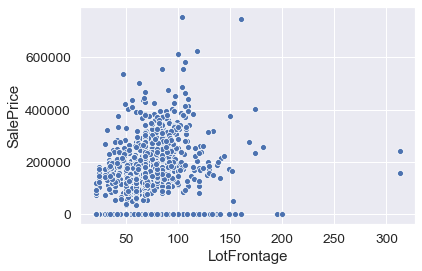

,LotFrontage,GarageFinish,GarageQual,GarageCond,GarageYrBlt,GarageType,BsmtCond,BsmtExposure,BsmtQual,BsmtFinType2,...,HalfBath,FullBath,GrLivArea,LowQualFinSF,2ndFlrSF,1stFlrSF,CentralAir,SaleCondition,Heating,MSSubClass
Id,,,,,,,,,,,,,,,,,,,,,


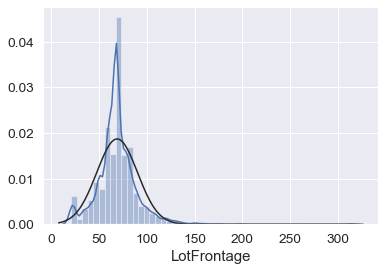

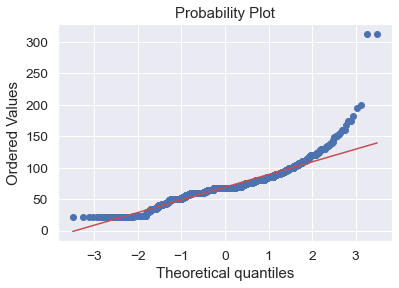

In [464]:
show('LotFrontage')

C:\Users\JCM\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


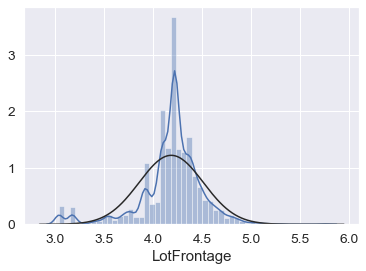

In [465]:
log('LotFrontage')

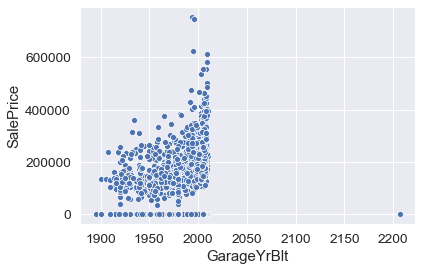

,LotFrontage,GarageFinish,GarageQual,GarageCond,GarageYrBlt,GarageType,BsmtCond,BsmtExposure,BsmtQual,BsmtFinType2,...,HalfBath,FullBath,GrLivArea,LowQualFinSF,2ndFlrSF,1stFlrSF,CentralAir,SaleCondition,Heating,MSSubClass
Id,,,,,,,,,,,,,,,,,,,,,


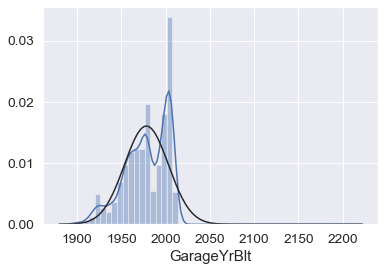

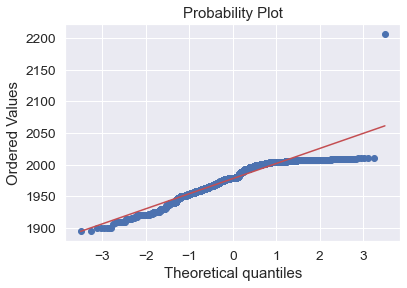

In [466]:
show('GarageYrBlt')

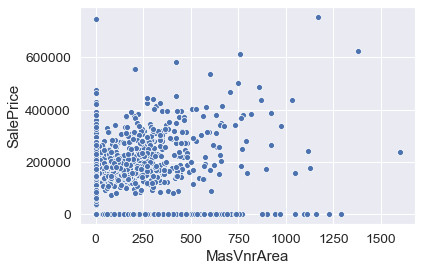

,LotFrontage,GarageFinish,GarageQual,GarageCond,GarageYrBlt,GarageType,BsmtCond,BsmtExposure,BsmtQual,BsmtFinType2,...,HalfBath,FullBath,GrLivArea,LowQualFinSF,2ndFlrSF,1stFlrSF,CentralAir,SaleCondition,Heating,MSSubClass
Id,,,,,,,,,,,,,,,,,,,,,
2,4.382027,RFn,TA,TA,1976.0,Attchd,TA,Gd,Gd,Unf,...,0,2,1262,0,0,1262,Y,Normal,GasA,20
4,4.094345,Unf,TA,TA,1998.0,Detchd,Gd,No,TA,Unf,...,0,1,1717,0,756,961,Y,Abnorml,GasA,70
6,4.442651,Unf,TA,TA,1993.0,Attchd,TA,No,Gd,Unf,...,1,1,1362,0,566,796,Y,Normal,GasA,50
9,3.931826,Unf,Fa,TA,1931.0,Detchd,TA,No,TA,Unf,...,0,2,1774,0,752,1022,Y,Abnorml,GasA,50
10,3.912023,RFn,Gd,TA,1939.0,Attchd,TA,No,TA,Unf,...,0,1,1077,0,0,1077,Y,Normal,GasA,190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,3.044522,Unf,TA,TA,1979.0,Attchd,TA,No,TA,Unf,...,1,1,1092,0,546,546,Y,Normal,GasA,160
2915,3.044522,Unf,TA,TA,1979.0,Attchd,TA,No,TA,Unf,...,1,1,1092,0,546,546,Y,Normal,GasA,160
2916,3.044522,Unf,TA,TA,1970.0,CarPort,TA,No,TA,Unf,...,1,1,1092,0,546,546,Y,Abnorml,GasA,160


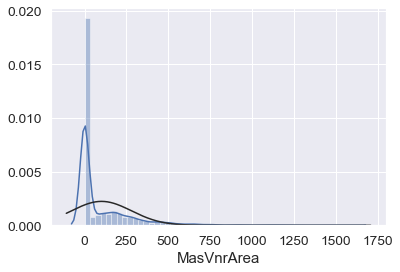

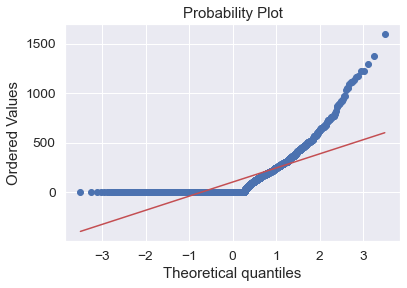

In [467]:
show('MasVnrArea')

C:\Users\JCM\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


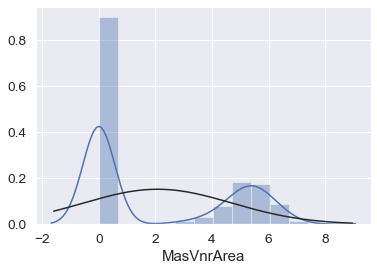

In [468]:
log0('MasVnrArea')

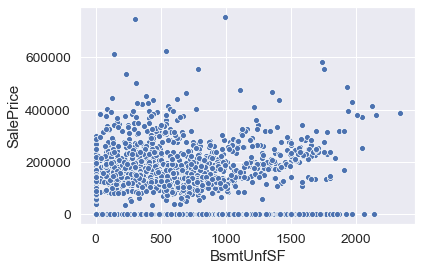

,LotFrontage,GarageFinish,GarageQual,GarageCond,GarageYrBlt,GarageType,BsmtCond,BsmtExposure,BsmtQual,BsmtFinType2,...,HalfBath,FullBath,GrLivArea,LowQualFinSF,2ndFlrSF,1stFlrSF,CentralAir,SaleCondition,Heating,MSSubClass
Id,,,,,,,,,,,,,,,,,,,,,
18,4.276666,Unf,TA,TA,1967.0,CarPort,TA,No,TA,Unf,...,0,2,1296,0,0,1296,Y,Normal,GasA,90
40,4.174387,Unf,TA,TA,1979.0,Attchd,TA,No,TA,Unf,...,0,2,1152,0,0,1152,N,AdjLand,GasA,90
43,4.219508,RFn,TA,Gd,1983.0,Attchd,TA,Av,Gd,LwQ,...,0,1,884,0,0,884,Y,Normal,GasA,85
53,4.700480,Unf,TA,TA,1963.0,CarPort,TA,Gd,Gd,GLQ,...,0,1,816,0,0,816,N,Normal,GasA,90
55,4.094345,Unf,TA,TA,1962.0,Detchd,TA,No,TA,Unf,...,0,1,1360,0,0,1360,Y,Normal,GasA,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2875,4.060443,Unf,TA,TA,1945.0,Attchd,TA,Av,TA,Unf,...,0,1,1340,0,524,816,N,Abnorml,GasA,190
2892,4.234107,Unf,TA,TA,1979.0,Attchd,TA,No,TA,Unf,...,0,1,729,0,0,729,N,Abnorml,GasA,30
2895,3.713572,Fin,TA,TA,2005.0,Attchd,TA,Gd,Ex,Unf,...,0,2,1778,0,0,1778,Y,Partial,GasA,120


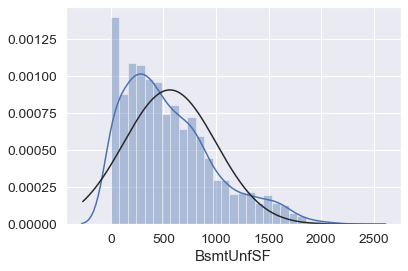

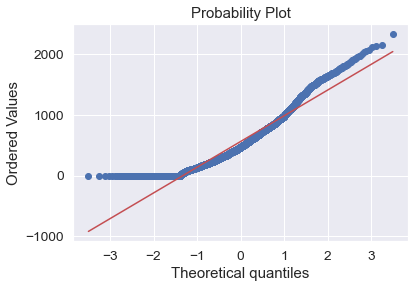

In [469]:
show('BsmtUnfSF')

C:\Users\JCM\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


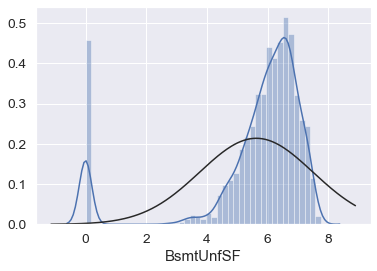

In [470]:
log0('BsmtUnfSF')

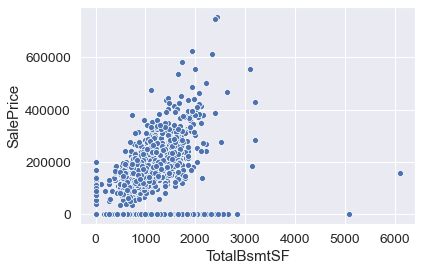

,LotFrontage,GarageFinish,GarageQual,GarageCond,GarageYrBlt,GarageType,BsmtCond,BsmtExposure,BsmtQual,BsmtFinType2,...,HalfBath,FullBath,GrLivArea,LowQualFinSF,2ndFlrSF,1stFlrSF,CentralAir,SaleCondition,Heating,MSSubClass
Id,,,,,,,,,,,,,,,,,,,,,
18,4.276666,Unf,TA,TA,1967.0,CarPort,TA,No,TA,Unf,...,0,2,1296,0,0,1296,Y,Normal,GasA,90
40,4.174387,Unf,TA,TA,1979.0,Attchd,TA,No,TA,Unf,...,0,2,1152,0,0,1152,N,AdjLand,GasA,90
91,4.094345,Unf,TA,TA,1950.0,Detchd,TA,No,TA,Unf,...,0,1,1040,0,0,1040,Y,Normal,GasA,20
103,4.158883,Unf,TA,TA,1979.0,Attchd,TA,No,TA,Unf,...,0,2,1535,0,0,1535,Y,Alloca,GasA,90
157,4.094345,Unf,TA,TA,1950.0,Detchd,TA,No,TA,Unf,...,0,1,1040,0,0,1040,Y,Normal,GasA,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2804,4.605170,RFn,TA,TA,1950.0,Attchd,TA,No,TA,Unf,...,0,1,1640,0,0,1640,Y,Normal,GasA,20
2805,4.007333,Unf,TA,TA,1939.0,Detchd,TA,No,TA,Unf,...,0,1,1032,0,0,1032,N,Normal,GasA,30
2825,4.382027,RFn,TA,TA,2002.0,Attchd,TA,No,TA,Unf,...,0,1,1488,0,0,1488,Y,Normal,GasA,20


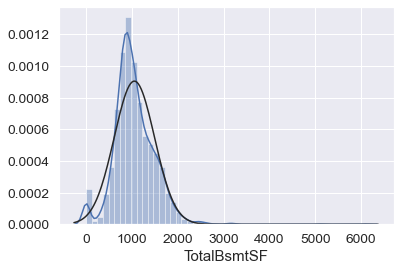

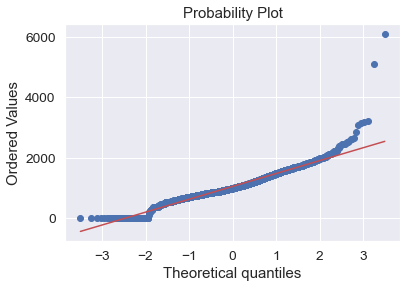

In [471]:
show('TotalBsmtSF')

C:\Users\JCM\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


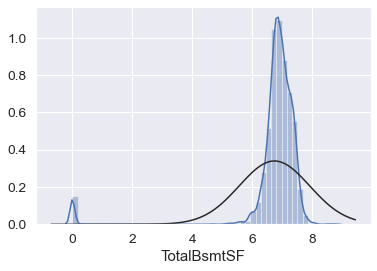

In [472]:
log0('TotalBsmtSF')

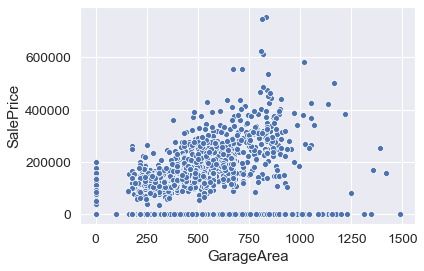

,LotFrontage,GarageFinish,GarageQual,GarageCond,GarageYrBlt,GarageType,BsmtCond,BsmtExposure,BsmtQual,BsmtFinType2,...,HalfBath,FullBath,GrLivArea,LowQualFinSF,2ndFlrSF,1stFlrSF,CentralAir,SaleCondition,Heating,MSSubClass
Id,,,,,,,,,,,,,,,,,,,,,
40,4.174387,Unf,TA,TA,1979.0,Attchd,TA,No,TA,Unf,...,0,2,1152,0,0,1152,N,AdjLand,GasA,90
49,3.496508,Unf,TA,TA,1979.0,Attchd,TA,No,TA,Unf,...,0,2,1452,0,716,736,Y,Partial,GasA,190
79,4.276666,Unf,TA,TA,1979.0,Attchd,TA,No,TA,Unf,...,0,2,1768,0,0,1768,N,Normal,GasA,90
89,4.653960,Unf,TA,TA,1979.0,Attchd,Fa,No,TA,Unf,...,0,1,1526,513,0,1013,N,Abnorml,GasA,50
90,4.094345,Unf,TA,TA,1979.0,Attchd,TA,No,Gd,Unf,...,0,1,990,0,0,990,Y,Normal,GasA,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2894,4.094345,Unf,TA,TA,1979.0,Attchd,Fa,No,Fa,Unf,...,0,1,936,0,360,576,N,Normal,GasA,50
2910,3.044522,Unf,TA,TA,1979.0,Attchd,TA,Av,Gd,Unf,...,0,1,630,0,0,630,Y,Normal,GasA,180
2914,3.044522,Unf,TA,TA,1979.0,Attchd,TA,No,TA,Unf,...,1,1,1092,0,546,546,Y,Normal,GasA,160


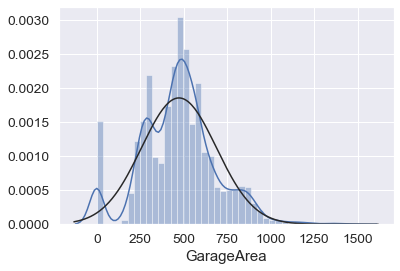

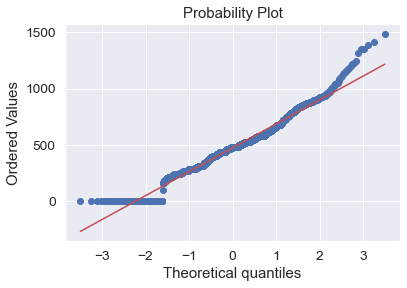

In [473]:
show('GarageArea')

C:\Users\JCM\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


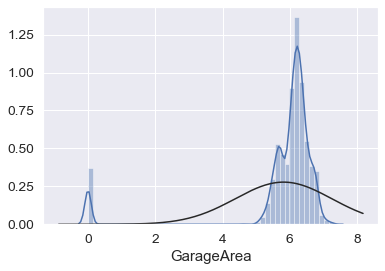

In [474]:
log0('GarageArea')

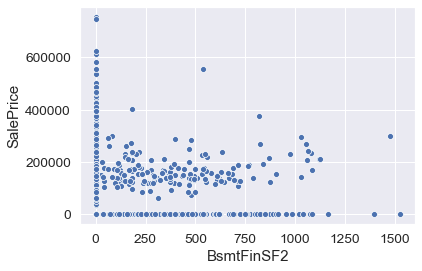

,LotFrontage,GarageFinish,GarageQual,GarageCond,GarageYrBlt,GarageType,BsmtCond,BsmtExposure,BsmtQual,BsmtFinType2,...,HalfBath,FullBath,GrLivArea,LowQualFinSF,2ndFlrSF,1stFlrSF,CentralAir,SaleCondition,Heating,MSSubClass
Id,,,,,,,,,,,,,,,,,,,,,
1,4.174387,RFn,TA,TA,2003.0,Attchd,TA,No,Gd,Unf,...,1,2,1710,0,854,856,Y,Normal,GasA,60
2,4.382027,RFn,TA,TA,1976.0,Attchd,TA,Gd,Gd,Unf,...,0,2,1262,0,0,1262,Y,Normal,GasA,20
3,4.219508,RFn,TA,TA,2001.0,Attchd,TA,Mn,Gd,Unf,...,1,2,1786,0,866,920,Y,Normal,GasA,60
4,4.094345,Unf,TA,TA,1998.0,Detchd,Gd,No,TA,Unf,...,0,1,1717,0,756,961,Y,Abnorml,GasA,70
5,4.430817,RFn,TA,TA,2000.0,Attchd,TA,Av,Gd,Unf,...,1,2,2198,0,1053,1145,Y,Normal,GasA,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,3.044522,Unf,TA,TA,1979.0,Attchd,TA,No,TA,Unf,...,1,1,1092,0,546,546,Y,Normal,GasA,160
2916,3.044522,Unf,TA,TA,1970.0,CarPort,TA,No,TA,Unf,...,1,1,1092,0,546,546,Y,Abnorml,GasA,160
2917,5.075174,Unf,TA,TA,1960.0,Detchd,TA,No,TA,Unf,...,0,1,1224,0,0,1224,Y,Abnorml,GasA,20


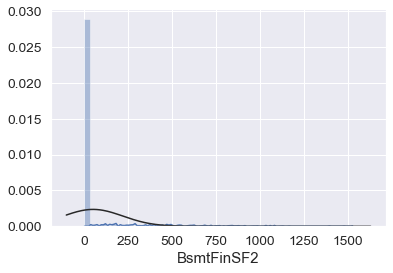

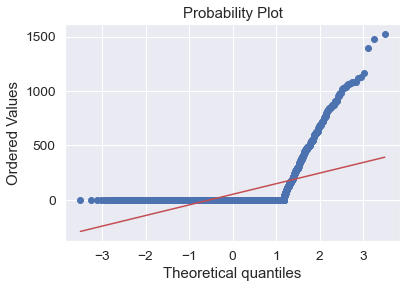

In [475]:
show('BsmtFinSF2')

C:\Users\JCM\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


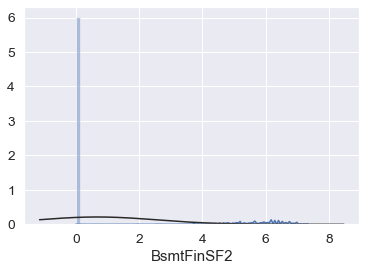

In [476]:
log0('BsmtFinSF2')

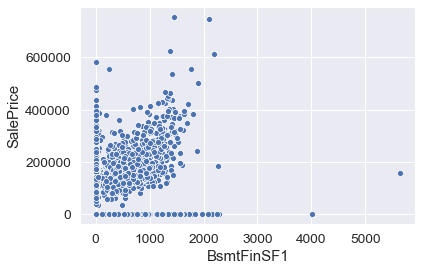

,LotFrontage,GarageFinish,GarageQual,GarageCond,GarageYrBlt,GarageType,BsmtCond,BsmtExposure,BsmtQual,BsmtFinType2,...,HalfBath,FullBath,GrLivArea,LowQualFinSF,2ndFlrSF,1stFlrSF,CentralAir,SaleCondition,Heating,MSSubClass
Id,,,,,,,,,,,,,,,,,,,,,
9,3.931826,Unf,Fa,TA,1931.0,Detchd,TA,No,TA,Unf,...,0,2,1774,0,752,1022,Y,Abnorml,GasA,50
14,4.510860,RFn,TA,TA,2006.0,Attchd,TA,Av,Gd,Unf,...,0,2,1494,0,0,1494,Y,Partial,GasA,20
16,3.931826,Unf,TA,TA,1991.0,Detchd,TA,No,TA,Unf,...,0,1,854,0,0,854,Y,Normal,GasA,45
18,4.276666,Unf,TA,TA,1967.0,CarPort,TA,No,TA,Unf,...,0,2,1296,0,0,1296,Y,Normal,GasA,90
21,4.615121,RFn,TA,TA,2005.0,BuiltIn,TA,Av,Ex,Unf,...,1,3,2376,0,1218,1158,Y,Partial,GasA,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2899,4.248495,RFn,TA,TA,2001.0,Attchd,TA,No,Ex,Unf,...,0,2,1491,0,0,1491,Y,Normal,GasA,20
2905,4.828314,Unf,Fa,TA,1951.0,Attchd,TA,No,TA,Unf,...,1,1,1600,0,0,1600,Y,Normal,GasA,20
2907,3.713572,RFn,TA,TA,1977.0,BuiltIn,TA,Mn,Gd,Unf,...,1,1,1304,0,688,616,Y,Normal,GasA,160


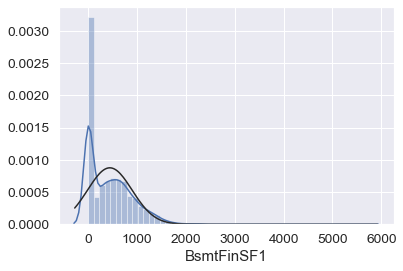

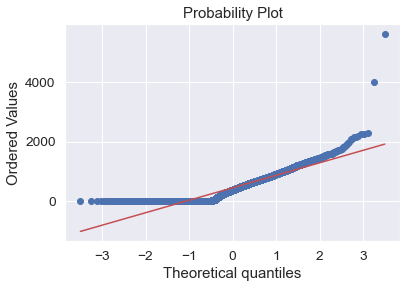

In [477]:
show('BsmtFinSF1')

C:\Users\JCM\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


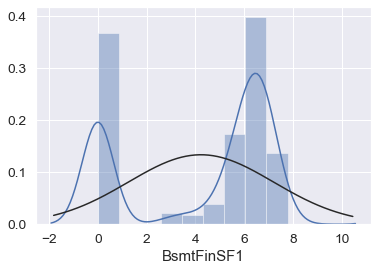

In [478]:
log0('BsmtFinSF1')

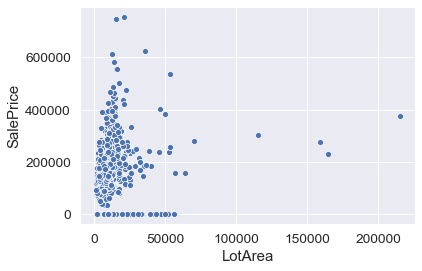

,LotFrontage,GarageFinish,GarageQual,GarageCond,GarageYrBlt,GarageType,BsmtCond,BsmtExposure,BsmtQual,BsmtFinType2,...,HalfBath,FullBath,GrLivArea,LowQualFinSF,2ndFlrSF,1stFlrSF,CentralAir,SaleCondition,Heating,MSSubClass
Id,,,,,,,,,,,,,,,,,,,,,


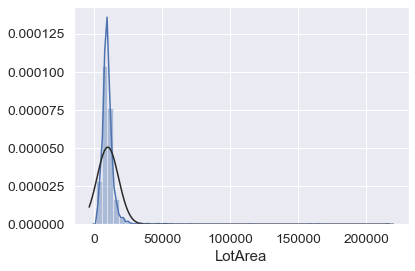

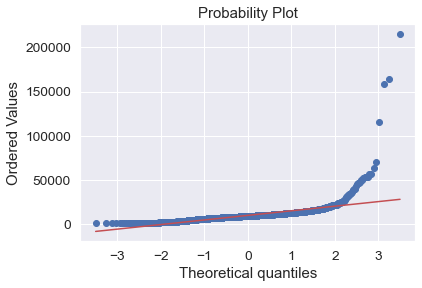

In [479]:
show('LotArea')

C:\Users\JCM\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


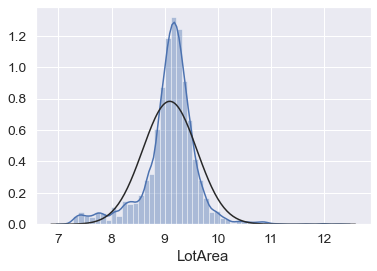

In [480]:
log('LotArea')

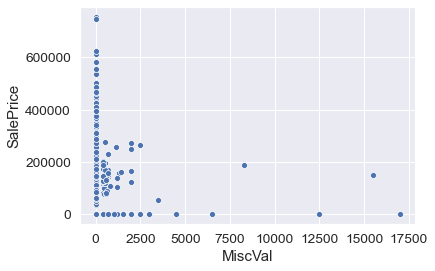

,LotFrontage,GarageFinish,GarageQual,GarageCond,GarageYrBlt,GarageType,BsmtCond,BsmtExposure,BsmtQual,BsmtFinType2,...,HalfBath,FullBath,GrLivArea,LowQualFinSF,2ndFlrSF,1stFlrSF,CentralAir,SaleCondition,Heating,MSSubClass
Id,,,,,,,,,,,,,,,,,,,,,
1,4.174387,RFn,TA,TA,2003.0,Attchd,TA,No,Gd,Unf,...,1,2,1710,0,854,856,Y,Normal,GasA,60
2,4.382027,RFn,TA,TA,1976.0,Attchd,TA,Gd,Gd,Unf,...,0,2,1262,0,0,1262,Y,Normal,GasA,20
3,4.219508,RFn,TA,TA,2001.0,Attchd,TA,Mn,Gd,Unf,...,1,2,1786,0,866,920,Y,Normal,GasA,60
4,4.094345,Unf,TA,TA,1998.0,Detchd,Gd,No,TA,Unf,...,0,1,1717,0,756,961,Y,Abnorml,GasA,70
5,4.430817,RFn,TA,TA,2000.0,Attchd,TA,Av,Gd,Unf,...,1,2,2198,0,1053,1145,Y,Normal,GasA,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,3.044522,Unf,TA,TA,1979.0,Attchd,TA,No,TA,Unf,...,1,1,1092,0,546,546,Y,Normal,GasA,160
2915,3.044522,Unf,TA,TA,1979.0,Attchd,TA,No,TA,Unf,...,1,1,1092,0,546,546,Y,Normal,GasA,160
2916,3.044522,Unf,TA,TA,1970.0,CarPort,TA,No,TA,Unf,...,1,1,1092,0,546,546,Y,Abnorml,GasA,160


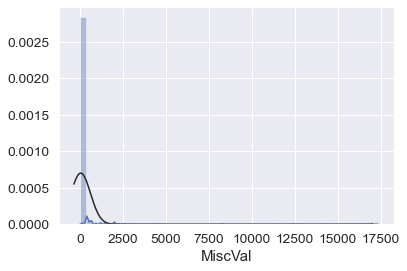

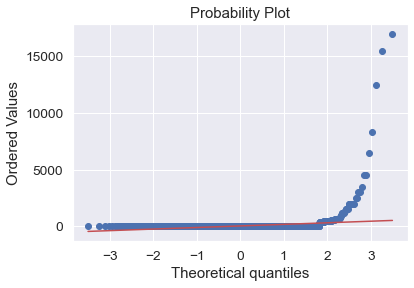

In [481]:
show('MiscVal')

C:\Users\JCM\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


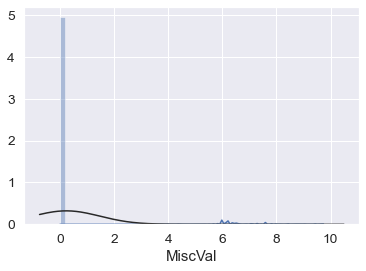

In [482]:
log0('MiscVal')

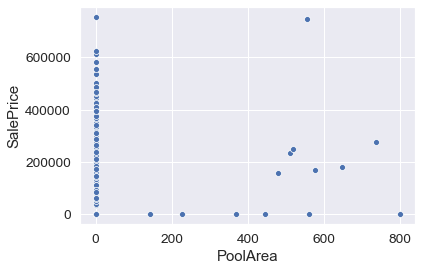

,LotFrontage,GarageFinish,GarageQual,GarageCond,GarageYrBlt,GarageType,BsmtCond,BsmtExposure,BsmtQual,BsmtFinType2,...,HalfBath,FullBath,GrLivArea,LowQualFinSF,2ndFlrSF,1stFlrSF,CentralAir,SaleCondition,Heating,MSSubClass
Id,,,,,,,,,,,,,,,,,,,,,
1,4.174387,RFn,TA,TA,2003.0,Attchd,TA,No,Gd,Unf,...,1,2,1710,0,854,856,Y,Normal,GasA,60
2,4.382027,RFn,TA,TA,1976.0,Attchd,TA,Gd,Gd,Unf,...,0,2,1262,0,0,1262,Y,Normal,GasA,20
3,4.219508,RFn,TA,TA,2001.0,Attchd,TA,Mn,Gd,Unf,...,1,2,1786,0,866,920,Y,Normal,GasA,60
4,4.094345,Unf,TA,TA,1998.0,Detchd,Gd,No,TA,Unf,...,0,1,1717,0,756,961,Y,Abnorml,GasA,70
5,4.430817,RFn,TA,TA,2000.0,Attchd,TA,Av,Gd,Unf,...,1,2,2198,0,1053,1145,Y,Normal,GasA,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,3.044522,Unf,TA,TA,1979.0,Attchd,TA,No,TA,Unf,...,1,1,1092,0,546,546,Y,Normal,GasA,160
2916,3.044522,Unf,TA,TA,1970.0,CarPort,TA,No,TA,Unf,...,1,1,1092,0,546,546,Y,Abnorml,GasA,160
2917,5.075174,Unf,TA,TA,1960.0,Detchd,TA,No,TA,Unf,...,0,1,1224,0,0,1224,Y,Abnorml,GasA,20


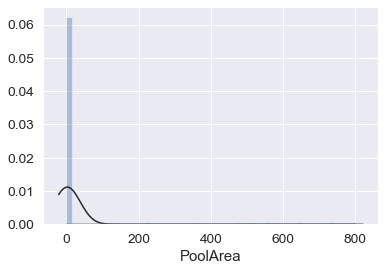

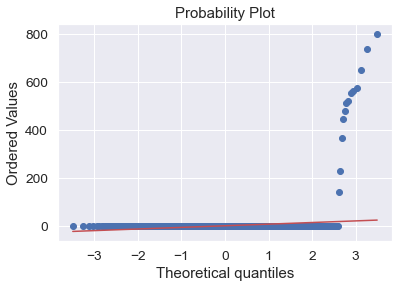

In [483]:
show('PoolArea')

C:\Users\JCM\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


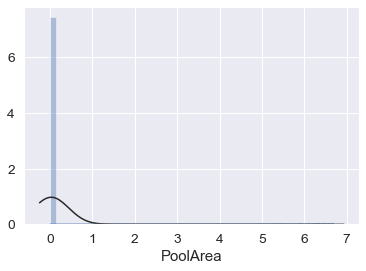

In [484]:
log0('PoolArea')

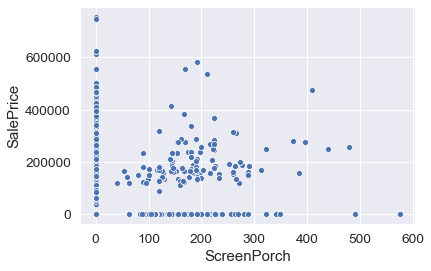

,LotFrontage,GarageFinish,GarageQual,GarageCond,GarageYrBlt,GarageType,BsmtCond,BsmtExposure,BsmtQual,BsmtFinType2,...,HalfBath,FullBath,GrLivArea,LowQualFinSF,2ndFlrSF,1stFlrSF,CentralAir,SaleCondition,Heating,MSSubClass
Id,,,,,,,,,,,,,,,,,,,,,
1,4.174387,RFn,TA,TA,2003.0,Attchd,TA,No,Gd,Unf,...,1,2,1710,0,854,856,Y,Normal,GasA,60
2,4.382027,RFn,TA,TA,1976.0,Attchd,TA,Gd,Gd,Unf,...,0,2,1262,0,0,1262,Y,Normal,GasA,20
3,4.219508,RFn,TA,TA,2001.0,Attchd,TA,Mn,Gd,Unf,...,1,2,1786,0,866,920,Y,Normal,GasA,60
4,4.094345,Unf,TA,TA,1998.0,Detchd,Gd,No,TA,Unf,...,0,1,1717,0,756,961,Y,Abnorml,GasA,70
5,4.430817,RFn,TA,TA,2000.0,Attchd,TA,Av,Gd,Unf,...,1,2,2198,0,1053,1145,Y,Normal,GasA,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,3.044522,Unf,TA,TA,1979.0,Attchd,TA,No,TA,Unf,...,1,1,1092,0,546,546,Y,Normal,GasA,160
2916,3.044522,Unf,TA,TA,1970.0,CarPort,TA,No,TA,Unf,...,1,1,1092,0,546,546,Y,Abnorml,GasA,160
2917,5.075174,Unf,TA,TA,1960.0,Detchd,TA,No,TA,Unf,...,0,1,1224,0,0,1224,Y,Abnorml,GasA,20


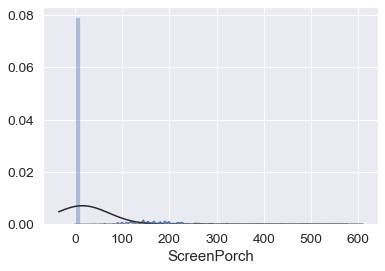

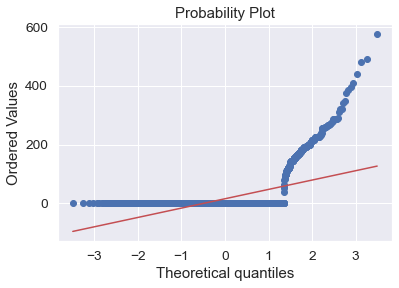

In [485]:
show('ScreenPorch')

C:\Users\JCM\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


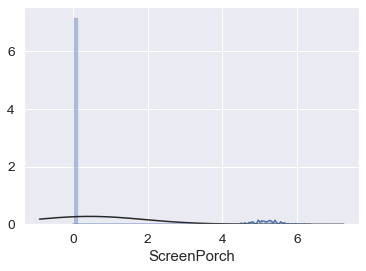

In [486]:
log0('ScreenPorch')

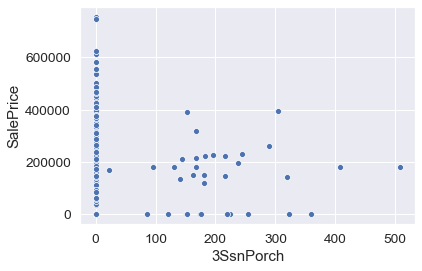

,LotFrontage,GarageFinish,GarageQual,GarageCond,GarageYrBlt,GarageType,BsmtCond,BsmtExposure,BsmtQual,BsmtFinType2,...,HalfBath,FullBath,GrLivArea,LowQualFinSF,2ndFlrSF,1stFlrSF,CentralAir,SaleCondition,Heating,MSSubClass
Id,,,,,,,,,,,,,,,,,,,,,
1,4.174387,RFn,TA,TA,2003.0,Attchd,TA,No,Gd,Unf,...,1,2,1710,0,854,856,Y,Normal,GasA,60
2,4.382027,RFn,TA,TA,1976.0,Attchd,TA,Gd,Gd,Unf,...,0,2,1262,0,0,1262,Y,Normal,GasA,20
3,4.219508,RFn,TA,TA,2001.0,Attchd,TA,Mn,Gd,Unf,...,1,2,1786,0,866,920,Y,Normal,GasA,60
4,4.094345,Unf,TA,TA,1998.0,Detchd,Gd,No,TA,Unf,...,0,1,1717,0,756,961,Y,Abnorml,GasA,70
5,4.430817,RFn,TA,TA,2000.0,Attchd,TA,Av,Gd,Unf,...,1,2,2198,0,1053,1145,Y,Normal,GasA,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,3.044522,Unf,TA,TA,1979.0,Attchd,TA,No,TA,Unf,...,1,1,1092,0,546,546,Y,Normal,GasA,160
2916,3.044522,Unf,TA,TA,1970.0,CarPort,TA,No,TA,Unf,...,1,1,1092,0,546,546,Y,Abnorml,GasA,160
2917,5.075174,Unf,TA,TA,1960.0,Detchd,TA,No,TA,Unf,...,0,1,1224,0,0,1224,Y,Abnorml,GasA,20


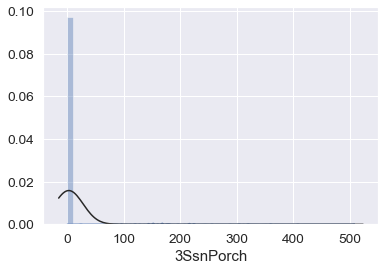

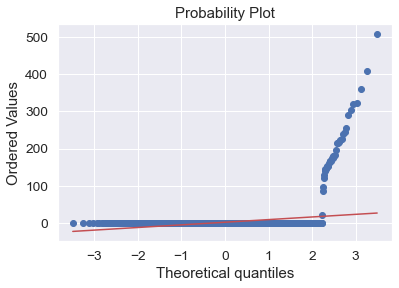

In [487]:
show('3SsnPorch')

C:\Users\JCM\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


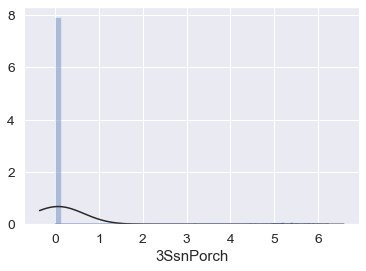

In [488]:
log0('3SsnPorch')

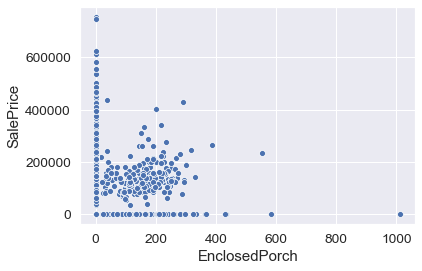

,LotFrontage,GarageFinish,GarageQual,GarageCond,GarageYrBlt,GarageType,BsmtCond,BsmtExposure,BsmtQual,BsmtFinType2,...,HalfBath,FullBath,GrLivArea,LowQualFinSF,2ndFlrSF,1stFlrSF,CentralAir,SaleCondition,Heating,MSSubClass
Id,,,,,,,,,,,,,,,,,,,,,
1,4.174387,RFn,TA,TA,2003.0,Attchd,TA,No,Gd,Unf,...,1,2,1710,0,854,856,Y,Normal,GasA,60
2,4.382027,RFn,TA,TA,1976.0,Attchd,TA,Gd,Gd,Unf,...,0,2,1262,0,0,1262,Y,Normal,GasA,20
3,4.219508,RFn,TA,TA,2001.0,Attchd,TA,Mn,Gd,Unf,...,1,2,1786,0,866,920,Y,Normal,GasA,60
5,4.430817,RFn,TA,TA,2000.0,Attchd,TA,Av,Gd,Unf,...,1,2,2198,0,1053,1145,Y,Normal,GasA,60
6,4.442651,Unf,TA,TA,1993.0,Attchd,TA,No,Gd,Unf,...,1,1,1362,0,566,796,Y,Normal,GasA,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,3.044522,Unf,TA,TA,1979.0,Attchd,TA,No,TA,Unf,...,1,1,1092,0,546,546,Y,Normal,GasA,160
2916,3.044522,Unf,TA,TA,1970.0,CarPort,TA,No,TA,Unf,...,1,1,1092,0,546,546,Y,Abnorml,GasA,160
2917,5.075174,Unf,TA,TA,1960.0,Detchd,TA,No,TA,Unf,...,0,1,1224,0,0,1224,Y,Abnorml,GasA,20


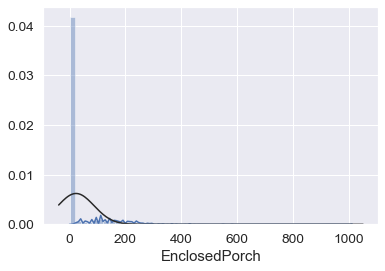

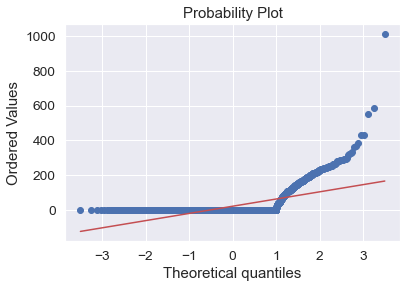

In [489]:
show('EnclosedPorch')

C:\Users\JCM\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


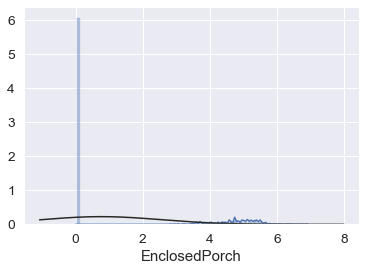

In [490]:
log0('EnclosedPorch')

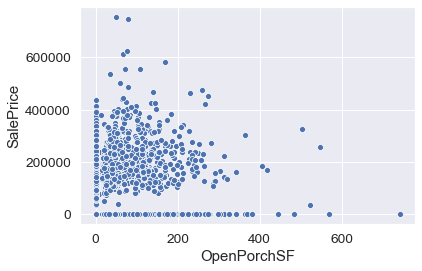

,LotFrontage,GarageFinish,GarageQual,GarageCond,GarageYrBlt,GarageType,BsmtCond,BsmtExposure,BsmtQual,BsmtFinType2,...,HalfBath,FullBath,GrLivArea,LowQualFinSF,2ndFlrSF,1stFlrSF,CentralAir,SaleCondition,Heating,MSSubClass
Id,,,,,,,,,,,,,,,,,,,,,
2,4.382027,RFn,TA,TA,1976.0,Attchd,TA,Gd,Gd,Unf,...,0,2,1262,0,0,1262,Y,Normal,GasA,20
9,3.931826,Unf,Fa,TA,1931.0,Detchd,TA,No,TA,Unf,...,0,2,1774,0,752,1022,Y,Abnorml,GasA,50
11,4.248495,Unf,TA,TA,1965.0,Detchd,TA,No,TA,Unf,...,0,1,1040,0,0,1040,Y,Normal,GasA,20
13,4.219508,Unf,TA,TA,1962.0,Detchd,TA,No,TA,Unf,...,0,1,912,0,0,912,Y,Normal,GasA,20
17,4.219508,Fin,TA,TA,1970.0,Attchd,TA,No,TA,Unf,...,0,1,1004,0,0,1004,Y,Normal,GasA,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2911,3.044522,Unf,TA,Fa,1972.0,Attchd,TA,No,TA,Unf,...,1,1,1092,0,546,546,Y,Normal,GasA,160
2912,4.382027,RFn,TA,TA,1969.0,Attchd,TA,Av,TA,BLQ,...,0,1,1360,0,0,1360,Y,Normal,GasA,20
2913,3.044522,Unf,TA,TA,1970.0,CarPort,TA,No,TA,Unf,...,1,1,1092,0,546,546,Y,Abnorml,GasA,160


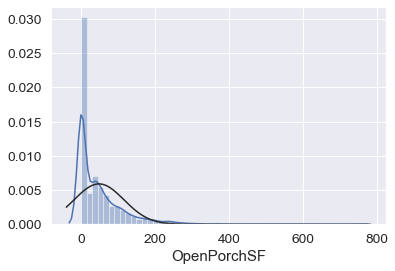

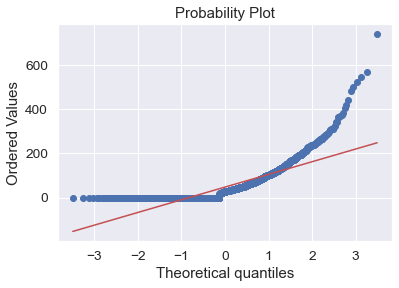

In [491]:
show('OpenPorchSF')

C:\Users\JCM\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


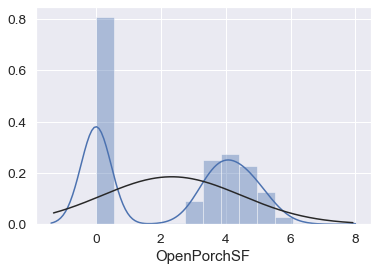

In [492]:
log0('OpenPorchSF')

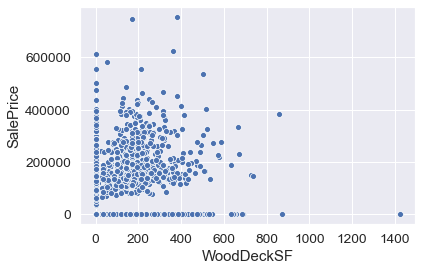

,LotFrontage,GarageFinish,GarageQual,GarageCond,GarageYrBlt,GarageType,BsmtCond,BsmtExposure,BsmtQual,BsmtFinType2,...,HalfBath,FullBath,GrLivArea,LowQualFinSF,2ndFlrSF,1stFlrSF,CentralAir,SaleCondition,Heating,MSSubClass
Id,,,,,,,,,,,,,,,,,,,,,
1,4.174387,RFn,TA,TA,2003.0,Attchd,TA,No,Gd,Unf,...,1,2,1710,0,854,856,Y,Normal,GasA,60
3,4.219508,RFn,TA,TA,2001.0,Attchd,TA,Mn,Gd,Unf,...,1,2,1786,0,866,920,Y,Normal,GasA,60
4,4.094345,Unf,TA,TA,1998.0,Detchd,Gd,No,TA,Unf,...,0,1,1717,0,756,961,Y,Abnorml,GasA,70
10,3.912023,RFn,Gd,TA,1939.0,Attchd,TA,No,TA,Unf,...,0,1,1077,0,0,1077,Y,Normal,GasA,190
11,4.248495,Unf,TA,TA,1965.0,Detchd,TA,No,TA,Unf,...,0,1,1040,0,0,1040,Y,Normal,GasA,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2911,3.044522,Unf,TA,Fa,1972.0,Attchd,TA,No,TA,Unf,...,1,1,1092,0,546,546,Y,Normal,GasA,160
2913,3.044522,Unf,TA,TA,1970.0,CarPort,TA,No,TA,Unf,...,1,1,1092,0,546,546,Y,Abnorml,GasA,160
2914,3.044522,Unf,TA,TA,1979.0,Attchd,TA,No,TA,Unf,...,1,1,1092,0,546,546,Y,Normal,GasA,160


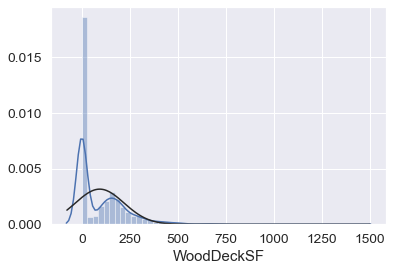

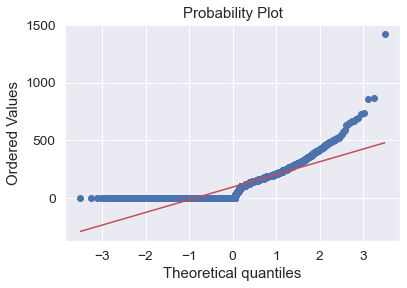

In [493]:
show('WoodDeckSF')

C:\Users\JCM\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


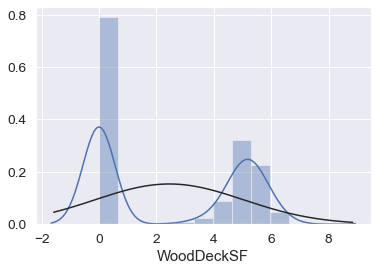

In [494]:
log0('WoodDeckSF')

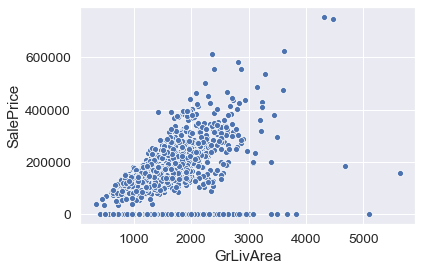

,LotFrontage,GarageFinish,GarageQual,GarageCond,GarageYrBlt,GarageType,BsmtCond,BsmtExposure,BsmtQual,BsmtFinType2,...,HalfBath,FullBath,GrLivArea,LowQualFinSF,2ndFlrSF,1stFlrSF,CentralAir,SaleCondition,Heating,MSSubClass
Id,,,,,,,,,,,,,,,,,,,,,


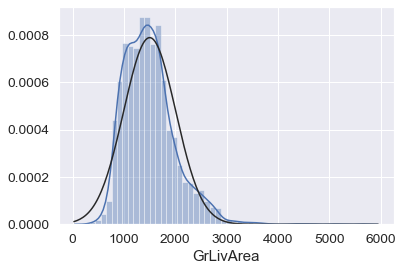

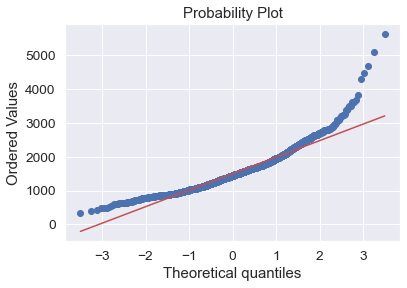

In [495]:
show('GrLivArea')

C:\Users\JCM\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


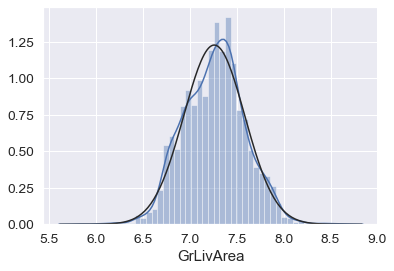

In [496]:
log('GrLivArea')

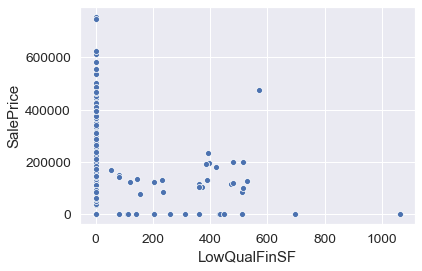

,LotFrontage,GarageFinish,GarageQual,GarageCond,GarageYrBlt,GarageType,BsmtCond,BsmtExposure,BsmtQual,BsmtFinType2,...,HalfBath,FullBath,GrLivArea,LowQualFinSF,2ndFlrSF,1stFlrSF,CentralAir,SaleCondition,Heating,MSSubClass
Id,,,,,,,,,,,,,,,,,,,,,
1,4.174387,RFn,TA,TA,2003.0,Attchd,TA,No,Gd,Unf,...,1,2,7.444249,0,854,856,Y,Normal,GasA,60
2,4.382027,RFn,TA,TA,1976.0,Attchd,TA,Gd,Gd,Unf,...,0,2,7.140453,0,0,1262,Y,Normal,GasA,20
3,4.219508,RFn,TA,TA,2001.0,Attchd,TA,Mn,Gd,Unf,...,1,2,7.487734,0,866,920,Y,Normal,GasA,60
4,4.094345,Unf,TA,TA,1998.0,Detchd,Gd,No,TA,Unf,...,0,1,7.448334,0,756,961,Y,Abnorml,GasA,70
5,4.430817,RFn,TA,TA,2000.0,Attchd,TA,Av,Gd,Unf,...,1,2,7.695303,0,1053,1145,Y,Normal,GasA,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,3.044522,Unf,TA,TA,1979.0,Attchd,TA,No,TA,Unf,...,1,1,6.995766,0,546,546,Y,Normal,GasA,160
2916,3.044522,Unf,TA,TA,1970.0,CarPort,TA,No,TA,Unf,...,1,1,6.995766,0,546,546,Y,Abnorml,GasA,160
2917,5.075174,Unf,TA,TA,1960.0,Detchd,TA,No,TA,Unf,...,0,1,7.109879,0,0,1224,Y,Abnorml,GasA,20


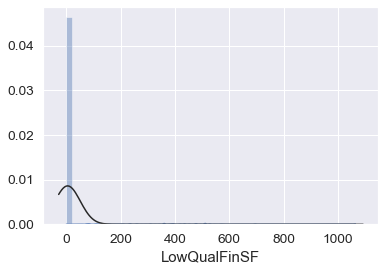

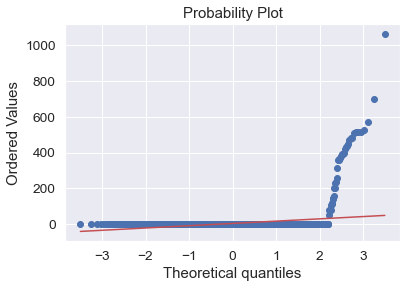

In [497]:
show('LowQualFinSF')

C:\Users\JCM\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


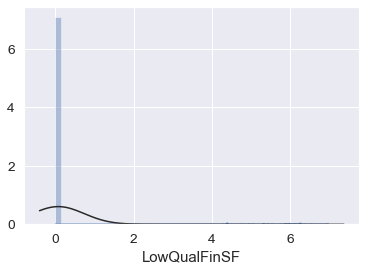

In [498]:
log0('LowQualFinSF')

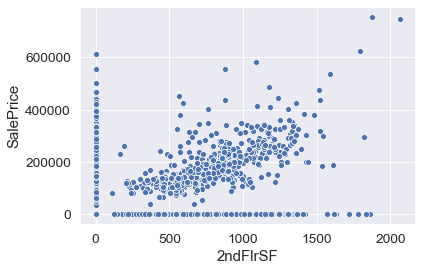

,LotFrontage,GarageFinish,GarageQual,GarageCond,GarageYrBlt,GarageType,BsmtCond,BsmtExposure,BsmtQual,BsmtFinType2,...,HalfBath,FullBath,GrLivArea,LowQualFinSF,2ndFlrSF,1stFlrSF,CentralAir,SaleCondition,Heating,MSSubClass
Id,,,,,,,,,,,,,,,,,,,,,
2,4.382027,RFn,TA,TA,1976.0,Attchd,TA,Gd,Gd,Unf,...,0,2,7.140453,0.0,0,1262,Y,Normal,GasA,20
7,4.317488,RFn,TA,TA,2004.0,Attchd,TA,Av,Ex,Unf,...,0,2,7.434848,0.0,0,1694,Y,Normal,GasA,20
10,3.912023,RFn,Gd,TA,1939.0,Attchd,TA,No,TA,Unf,...,0,1,6.981935,0.0,0,1077,Y,Normal,GasA,190
11,4.248495,Unf,TA,TA,1965.0,Detchd,TA,No,TA,Unf,...,0,1,6.946976,0.0,0,1040,Y,Normal,GasA,20
13,4.219508,Unf,TA,TA,1962.0,Detchd,TA,No,TA,Unf,...,0,1,6.815640,0.0,0,912,Y,Normal,GasA,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2909,4.219508,Unf,TA,TA,1970.0,2Types,TA,No,TA,Unf,...,0,2,7.409742,0.0,0,1652,Y,Normal,GasA,90
2910,3.044522,Unf,TA,TA,1979.0,Attchd,TA,Av,Gd,Unf,...,0,1,6.445720,0.0,0,630,Y,Normal,GasA,180
2912,4.382027,RFn,TA,TA,1969.0,Attchd,TA,Av,TA,BLQ,...,0,1,7.215240,0.0,0,1360,Y,Normal,GasA,20


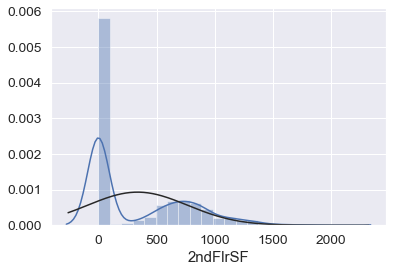

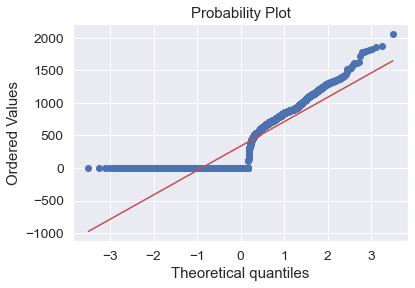

In [499]:
show('2ndFlrSF')

C:\Users\JCM\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


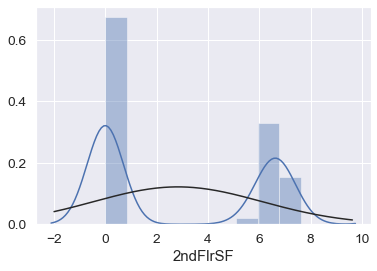

In [500]:
log0('2ndFlrSF')

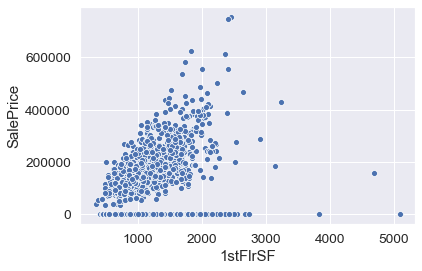

,LotFrontage,GarageFinish,GarageQual,GarageCond,GarageYrBlt,GarageType,BsmtCond,BsmtExposure,BsmtQual,BsmtFinType2,...,HalfBath,FullBath,GrLivArea,LowQualFinSF,2ndFlrSF,1stFlrSF,CentralAir,SaleCondition,Heating,MSSubClass
Id,,,,,,,,,,,,,,,,,,,,,


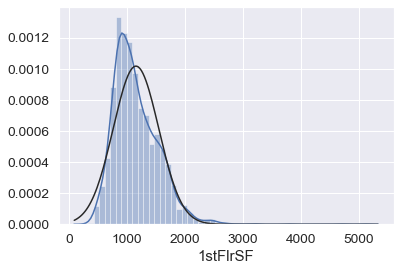

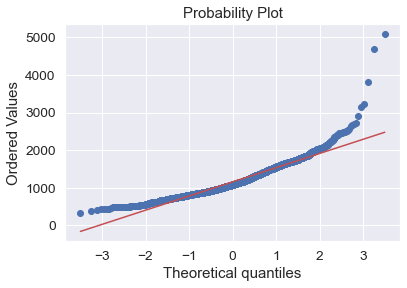

In [501]:
show('1stFlrSF')

C:\Users\JCM\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


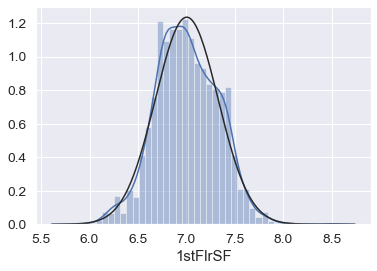

In [502]:
log('1stFlrSF')

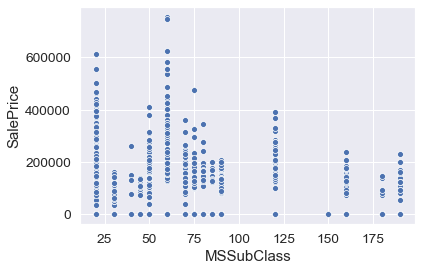

,LotFrontage,GarageFinish,GarageQual,GarageCond,GarageYrBlt,GarageType,BsmtCond,BsmtExposure,BsmtQual,BsmtFinType2,...,HalfBath,FullBath,GrLivArea,LowQualFinSF,2ndFlrSF,1stFlrSF,CentralAir,SaleCondition,Heating,MSSubClass
Id,,,,,,,,,,,,,,,,,,,,,


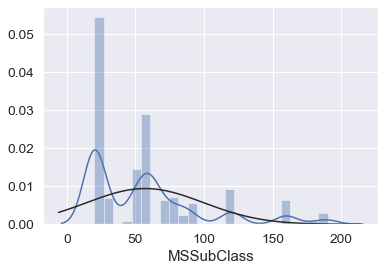

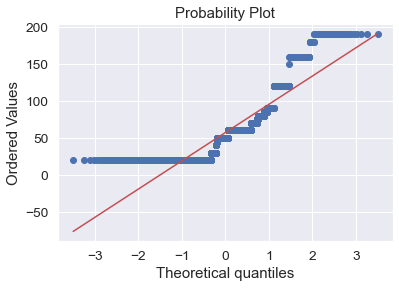

In [503]:
show('MSSubClass')

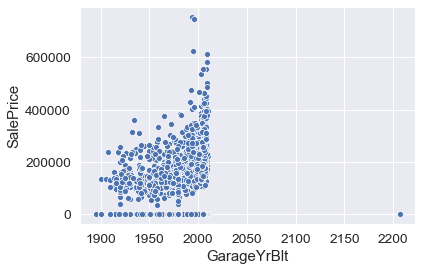

,LotFrontage,GarageFinish,GarageQual,GarageCond,GarageYrBlt,GarageType,BsmtCond,BsmtExposure,BsmtQual,BsmtFinType2,...,HalfBath,FullBath,GrLivArea,LowQualFinSF,2ndFlrSF,1stFlrSF,CentralAir,SaleCondition,Heating,MSSubClass
Id,,,,,,,,,,,,,,,,,,,,,


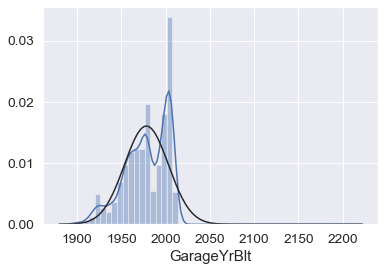

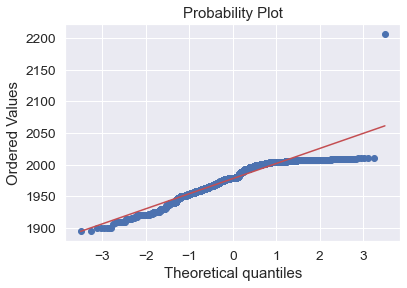

In [504]:
show('GarageYrBlt')

In [507]:
data[data['GarageYrBlt']>2010]

,LotFrontage,GarageFinish,GarageQual,GarageCond,GarageYrBlt,GarageType,BsmtCond,BsmtExposure,BsmtQual,BsmtFinType2,...,HalfBath,FullBath,GrLivArea,LowQualFinSF,2ndFlrSF,1stFlrSF,CentralAir,SaleCondition,Heating,MSSubClass
Id,,,,,,,,,,,,,,,,,,,,,
2593,4.219508,RFn,TA,TA,2207.0,Attchd,TA,Av,Gd,Unf,...,0,2,7.355002,0.0,0.0,7.355002,Y,Partial,GasA,20


In [527]:
data.iat[2592,4] = 2007.0

In [528]:
data[data.index==2593]

,LotFrontage,GarageFinish,GarageQual,GarageCond,GarageYrBlt,GarageType,BsmtCond,BsmtExposure,BsmtQual,BsmtFinType2,...,HalfBath,FullBath,GrLivArea,LowQualFinSF,2ndFlrSF,1stFlrSF,CentralAir,SaleCondition,Heating,MSSubClass
Id,,,,,,,,,,,,,,,,,,,,,
2593,4.219508,RFn,TA,TA,2007.0,Attchd,TA,Av,Gd,Unf,...,0,2,7.355002,0.0,0.0,7.355002,Y,Partial,GasA,20


In [532]:
for col in cat_cols:
    df = pd.get_dummies(data[col],drop_first=True)
    data.drop(col, axis=1, inplace=True)
    data = pd.concat([data,df], axis=1)

C:\Users\JCM\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [533]:
data

,LotFrontage,GarageYrBlt,MasVnrArea,BsmtHalfBath,BsmtFullBath,BsmtUnfSF,TotalBsmtSF,GarageArea,BsmtFinSF2,GarageCars,...,AdjLand,Alloca,Family,Normal,Partial,GasA,GasW,Grav,OthW,Wall
Id,,,,,,,,,,,,,,,,,,,,,
1,4.174387,2003.0,5.283204,0.0,1.0,5.017280,6.753438,6.308098,0.0,2.0,...,0,0,0,1,0,1,0,0,0,0
2,4.382027,1976.0,0.000000,1.0,0.0,5.652489,7.141245,6.133398,0.0,2.0,...,0,0,0,1,0,1,0,0,0,0
3,4.219508,2001.0,5.093750,0.0,1.0,6.075346,6.825460,6.411818,0.0,2.0,...,0,0,0,1,0,1,0,0,0,0
4,4.094345,1998.0,0.000000,0.0,1.0,6.293419,6.629363,6.466145,0.0,3.0,...,0,0,0,0,0,1,0,0,0,0
5,4.430817,2000.0,5.860786,0.0,1.0,6.196444,7.044033,6.729824,0.0,3.0,...,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,3.044522,1979.0,0.000000,0.0,0.0,6.304449,6.304449,0.000000,0.0,0.0,...,0,0,0,1,0,1,0,0,0,0
2916,3.044522,1970.0,0.000000,0.0,0.0,5.686975,6.304449,5.659482,0.0,1.0,...,0,0,0,0,0,1,0,0,0,0
2917,5.075174,1960.0,0.000000,0.0,1.0,0.000000,7.110696,6.357842,0.0,2.0,...,0,0,0,0,0,1,0,0,0,0


In [534]:
data.columns.duplicated()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
        True,  True, False, False, False, False, False,  True,  True,
        True,  True, False, False,  True,  True,  True, False, False,
       False, False,  True,  True,  True,  True,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False,  True, False, False, False,
       False,  True, False,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [537]:
data = data.loc[:,~data.columns.duplicated()]
# '~' indicates we are slecting all the columns which are 'not' duplicated

In [538]:
data

,LotFrontage,GarageYrBlt,MasVnrArea,BsmtHalfBath,BsmtFullBath,BsmtUnfSF,TotalBsmtSF,GarageArea,BsmtFinSF2,GarageCars,...,AdjLand,Alloca,Family,Normal,Partial,GasA,GasW,Grav,OthW,Wall
Id,,,,,,,,,,,,,,,,,,,,,
1,4.174387,2003.0,5.283204,0.0,1.0,5.017280,6.753438,6.308098,0.0,2.0,...,0,0,0,1,0,1,0,0,0,0
2,4.382027,1976.0,0.000000,1.0,0.0,5.652489,7.141245,6.133398,0.0,2.0,...,0,0,0,1,0,1,0,0,0,0
3,4.219508,2001.0,5.093750,0.0,1.0,6.075346,6.825460,6.411818,0.0,2.0,...,0,0,0,1,0,1,0,0,0,0
4,4.094345,1998.0,0.000000,0.0,1.0,6.293419,6.629363,6.466145,0.0,3.0,...,0,0,0,0,0,1,0,0,0,0
5,4.430817,2000.0,5.860786,0.0,1.0,6.196444,7.044033,6.729824,0.0,3.0,...,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,3.044522,1979.0,0.000000,0.0,0.0,6.304449,6.304449,0.000000,0.0,0.0,...,0,0,0,1,0,1,0,0,0,0
2916,3.044522,1970.0,0.000000,0.0,0.0,5.686975,6.304449,5.659482,0.0,1.0,...,0,0,0,0,0,1,0,0,0,0
2917,5.075174,1960.0,0.000000,0.0,1.0,0.000000,7.110696,6.357842,0.0,2.0,...,0,0,0,0,0,1,0,0,0,0


In [543]:
train = data[data['SalePrice']>0]
test = data[data['SalePrice']==0]

In [544]:
test.drop(['SalePrice'],axis=1, inplace=True)

In [545]:
y_train = train['SalePrice']
x_train = train.drop(['SalePrice'], axis=1)
x_test = test

In [139]:
from sklearn.svm import SVR
reg_svr = SVR(kernel='rbf',degree=3)
reg_svr.fit(x_train,y_train)
y_svr = reg_svr.predict(x_test)

svr_df = pd.DataFrame({'Id': x_test.index, 'SalePrice': y_svr})
svr_df.to_csv('SVR_pred.csv', index=False)

C:\Users\JCM\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [140]:
from sklearn.tree import DecisionTreeRegressor
reg_dtr = DecisionTreeRegressor()
reg_dtr.fit(x_train,y_train)
y_dtr = reg_dtr.predict(x_test)

dtr_df = pd.DataFrame({'Id': x_test.index, 'SalePrice': y_dtr})
dtr_df.to_csv('DTR_pred.csv', index=False)

In [556]:
#RandoForestRegressor gave the best result in this particular problem.
from sklearn.ensemble import RandomForestRegressor
reg_rfr = RandomForestRegressor(n_estimators=248)
reg_rfr.fit(x_train,y_train)
y_rfr = reg_rfr.predict(x_test)

rfr_df = pd.DataFrame({'Id': x_test.index, 'SalePrice': y_rfr})
rfr_df.to_csv('RFR_pred_v2_240.csv', index=False)

In [143]:
from xgboost import XGBRegressor
reg_xgb = XGBRegressor(objective ='reg:squarederror',n_estimators = 10, seed = 123)
reg_xgb.fit(x_train,y_train)
y_xgb = reg_xgb.predict(x_test)

xgb_df = pd.DataFrame({'Id': x_test.index, 'SalePrice': y_xgb})
xgb_df.to_csv('XGB_pred.csv', index=False)

C:\Users\JCM\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\JCM\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \
